# 2.4 Ajuste por mínimos cuadrados

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

## Funciones en python

In [3]:
# Interpolacion de Lagrange
# INGRESO , Datos de prueba

def ajuste_minimos_cuadrados(xi, fi):
    # PROCEDIMIENTO
    n = len(xi)
    x = sym.Symbol('x')
    polinomio = 0
    divisorL = np.zeros(n, dtype = float)
    for i in range(0,n,1):
        # Termino de Lagrange
        numerador = 1
        denominador = 1
        for j  in range(0,n,1):
            if (j!=i):
                numerador = numerador*(x-xi[j])
                denominador = denominador*(xi[i]-xi[j])
        terminoLi = numerador/denominador

        polinomio = polinomio + terminoLi*fi[i]
        divisorL[i] = denominador

    # simplifica el polinomio
    polisimple = polinomio.expand()

    # para evaluación numérica
    px = sym.lambdify(x,polisimple)

    # Puntos para la gráfica
    muestras = 1001
    a = np.min(xi)
    b = np.max(xi)
    pxi = np.linspace(0.9*a,1.1*b,muestras)
    pfi = px(pxi)

    # SALIDA
    print('    valores de fi: ',fi)
    print('divisores en L(i): ',divisorL)
    print()
    print('Polinomio de Lagrange, expresiones')
    print(polinomio)
    print()
    print('Polinomio de Lagrange: ')
    print(polisimple)

    # Gráfica
    plt.plot(xi,fi,'o', label = 'Puntos')
    plt.plot(pxi,pfi, label = 'Polinomio')
    plt.legend()
    plt.xlabel('xi')
    plt.ylabel('fi')
    plt.title('Interpolación Lagrange')
    plt.show()

Si lo que se desea es marcar una tendencia, los polinomios de ajuste exacto no son los más adecuados,
es mejor buscar una curva (más simple), que tal vez no “toque” ningún punto, pero que pase “cerca”
de cada uno de ello.

parece que la relación real entre $x$ y $y$ es lineal. La razón probable para que ninguna línea se
ajuste con precisión a los datos son los errores en estos últimos. Por lo que es poco razonable
solicitar que la función de aproximación concuerde exactamente con los datos. De hecho,
dicha función introduciría oscilaciones que no estaban presentes originalmente.

## Errores

En la búsqueda de encontrar una curva "cercana" a una serie de puntos, es necesario definir cómo
*medir* el error que se comete al seleccionar una función $ \bar f(x) $. Existen varias posibilidades.

**Error relativo**: suponer que se tienen $n + 1$ puntos y que estos se ajustan con la función $ \bar f(x) $. El
error relativo que se comete con la función de ajuste es $ E_r \sum_{i=0}^n (y_i - \bar f(x)) $. Un problema en esta
situación es de compensación, es decir, pueden existir errores grandes que al sumarlos con otros de
igual magnitud pero de signo contrario, se cancelen y pareciera no ser entonces tan crítica la situación.

**Error absoluto**: para evitar que el error se compense, se toma el valor absoluto y el error se puede
calcular como $ E_a = \sum_{i=0}^n|y_i - \bar f(x)|$. Este error presenta dos problemas. Primero, puede ser que una
curva ajuste bien una lista de puntos, pero la suma de errores pequeños en cada punto puede finalmente
arrojar un error grande, y segundo, el hecho que la función valor absoluto presente problemas de
diferenciabilidad en un punto lo hace difícil de tratar.

**Error cuadrático**: esta manera de medir el error tiene la virtud de no presentar problemas de
diferenciabilidad y se define como: $ E_c \sum_{i=0}^n (y_i - \bar f(x))^2 $.

## Funciones de ajuste

En la selección de la función de ajuste $ \bar f(x) $, normalmente se escoge una combinación lineal de familias
de funciones base . Algunas de las familias más utilizadas en la práctica incluyen:

**Monomios:** $ \lbrace 1, x, x^2, ...\rbrace $

**Exponenciales:** $ \lbrace 1, e^{\pm x}, e^{\pm 2x}, ...\rbrace $

**Exponenciales complejas:** $ \lbrace 1, e^{\pm ix}, e^{\pm 2ix}, ...\rbrace $

**Funciones seno y coseno:** $ \lbrace 1, \cos x, \cos 2x, ...; \sin x, \sin 2x\rbrace $


Cada uno de estos conjuntos se selecciona según la naturaleza de los datos a trabajar. En la próxima
sección se estudian funciones de ajuste $\bar f(x)$ que son combinaciones lineales de la familia de los
*monomios* .


**Gráficamente se puede interpretar el ajuste por mínimos cuadrados**

<img src="imagenes/ajustes_cuadrados.png" title="Title text"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*


La gráfica obtenida (conpuntos de datos adicionales)


<img src="imagenes/ajustes_cuadrados2.png" title="Title text"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*


**********************

### Ejemplo práctico 1

Encontrar los valores de a0 y a1 que hacen mínimo el error cuadrático cuando se aproxima la lista $(−1, 2), (0, −1), (1, 1) y (2, −2)$ con un polinomio de grado uno.

se organizan los datos en la siguiente tabla y se suma por columnas:

|$i$| $x_i$| $y_i$| $x{^2}_i$| $y_i x_i$|
|--|--|--|--|--|
|0|-1|2|1|-2|
|1|0|-1|0|0|
|2|1|1|1|1|
|3|2|-2|4|-4|
|3|2|-2|4|-4|
|$\sum$|2|0|6|-5|


Al reemplazar en las ecuaciones para a0 y a1:

$$

  a_1 = \frac {(4)(-5) -(2)(0)}{(4)(6) − (2)^2} = \frac {-20}{20} = 1.0,  \\

$$


$$

  a_1 = \frac {(6)(0) -(2)(-5)}{20} = \frac {10}{20} = 0.5
  
$$


Por lo tanto, la función de ajuste es:

$$
  
  \bar f(x) = 0.5 + 1.0x

$$

Cuando la función de ajuste es un polinomio cuadrático, \bar f(x) = a_0 + a_1x + a_2x^2, el error es


$$

  E(a_0, a_1, a_2) = \sum_{i=0}^n (y_i − a_0 − a_1x_i − a_2x_{i}^2)^2

$$


Ahora el error depende de las constantes a0, a1 y a2 que se elijan. Para encontrar el valor de aquellas
que minimizan el error cuadrático se iguala el gradiente al vector nulo y lo anterior da origen a tres
ecuaciones normales:

$$ 
a_2 \sum_{i=0}^n x_{i}^2 + a1 \sum_{i=0}^n  x_i + a_0(n + 1) = \sum_{i=0}^n y_i, \\
$$

$$ 
a_2 \sum_{i=0}^n x_{i}^3 + a1 \sum_{i=0}^n  x_{i}^2 + a_0= \sum_{i=0}^n x_i = \sum_{i=0}^n y_i x_i, \\ 
$$

$$ 
a_2 \sum_{i=0}^n x_{i}^4 + a1 \sum_{i=0}^n  x_{i}^2 + a_0(n + 1) = \sum_{i=0}^n y_i x_{i}^2, \\
$$


con su correspondiente sistema lineal de ecuaciones en notación de matriz aumentada

$$
  \sum_{i=0}^n x_{i}^4
$$

$$
\left[\begin{array}{ccc}
 \sum_{i=0}^n x_{i}^4 & \sum_{i=0}^n x_{i}^3 & \sum_{i=0}^n x_{i}^2 \\ \\
 \sum_{i=0}^n x_{i}^3 & \sum_{i=0}^n x_{i}^2 & \sum_{i=0}^n x_{i} \\ \\ 
 \sum_{i=0}^n x_{i}^2 & \sum_{i=0}^n x_{i} & n + 1 
\end{array}\right]
\left[\begin{array}{ccc}
\sum_{i=0}^n y_i x_{i}^2 \\ \\ 
\sum_{i=0}^n y_i x_{i} \\ \\ 
\sum_{i=0}^n y_i 
\end{array}\right]

$$






Si se observa bien esta matriz, se puede notar que contiene al caso de la recta de mínimos cuadrados,
es decir, al sistema del caso anterior. Es más, esta nueva matriz se puede construir agregando una fila
a la izquierda y una columna arriba de la matriz aumentada del caso anterior teniendo en cuenta que
los exponentes de $x_i$ crecen hacia la izquierda y hacia arriba. Sucede igual cuando la función de ajuste
es un polinomio de grado 3, es decir, a la última matriz solo basta agregar una columna a la izquierda
y una fila arriba aumentando los exponentes hacia arriba y hacia la izquierda. De esta forma se puede
generalizar para polinomios de grado $n$.



    valores de fi:  [ 2 -1  1 -2]
divisores en L(i):  [-6.  2. -2.  6.]

Polinomio de Lagrange, expresiones
-x*(x - 2)*(x - 1)/3 - x*(x - 2)*(x + 1)/2 - x*(x - 1)*(x + 1)/3 - (x - 2)*(x - 1)*(x + 1)/2

Polinomio de Lagrange: 
-5*x**3/3 + 5*x**2/2 + 7*x/6 - 1


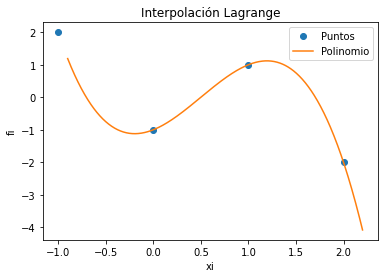

In [4]:

xi = np.array([-1,  0, 1,  2])
fi = np.array([2, -1,  1, -2])
# xi = np.array([1, 3, -2, 4])
# fi = np.array([-5, 1, -29, 19])

ajuste_minimos_cuadrados(xi, fi)